In [3]:
letters = ['a', 'b', 'c', 'c']
print(letters)
unique_letters = {letter for letter in letters}
unique_letters_list = list(unique_letters)
unique_letters_list.sort()
print(unique_letters_list)

['a', 'b', 'c', 'c']
['a', 'b', 'c']


In [5]:
sublist = 'ab df'
import re
pattern_3 = r" "


if  re.findall(pattern_3, sublist):
            print(sublist)

ab df


In [7]:
a = ['a','b','c','d']
x = len(a)
for i in range(x):
    for j in range(x):
        if (i < j):
            print(f"{i}: {j}")

0: 1
0: 2
0: 3
1: 2
1: 3
2: 3


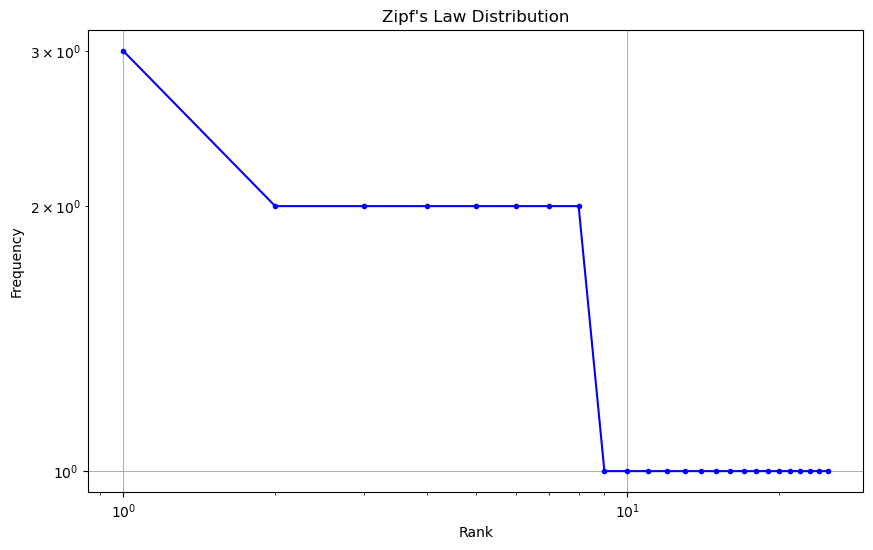

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

def calculate_zipf(text):
    cleaned_text = clean_text(text)
    words = cleaned_text.split()
    word_counts = Counter(words)
    ranked_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return ranked_words

def plot_zipf(ranked_words, title="Zipf's Law Distribution"):
    ranks = np.arange(1, len(ranked_words) + 1)
    frequencies = [count for word, count in ranked_words]

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='.', linestyle='-', color='blue')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    text_data = """This is a sample text to demonstrate Zipf's Law. 
                This text includes some repeated words to show frequency distribution. 
                Zipf's Law suggests that the frequency of a word is inversely proportional to its rank."""

    ranked_words = calculate_zipf(text_data)
    plot_zipf(ranked_words)

Legth lyriscs list: 2400
Legth word list: 998186


ValueError: x and y must have same first dimension, but have shapes (10000,) and (40677,)

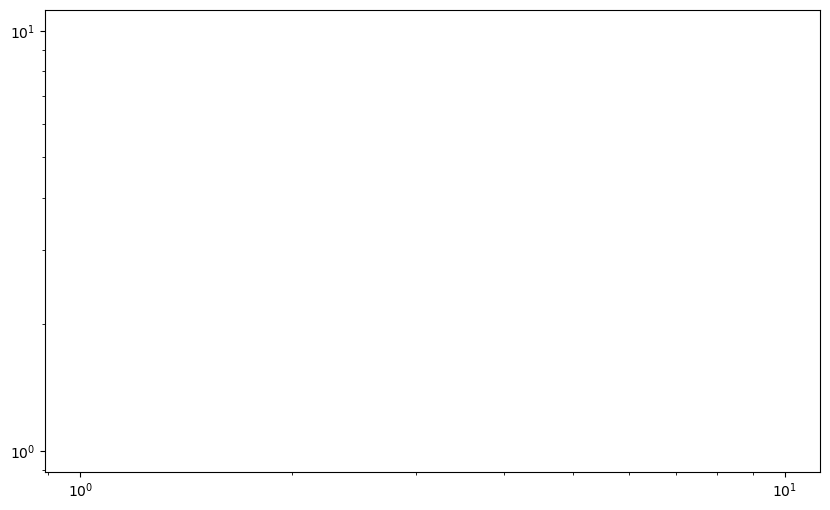

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path


def calculate_zipfs_law(words):
    # Remove punctuation and convert to lowercase
    #text = re.sub(r'[^\w\s]', '', text).lower()
    #words = text.split()
    
    # Count word frequencies
    word_counts = Counter(words)
    
    # Sort words by frequency in descending order
    ranked_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
    ranks = np.arange(1, 10001)
    frequencies = [count for word, count in ranked_words]
    
    return ranks, frequencies

def plot_zipfs_law(ranks, frequencies):
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='.', linestyle='-', color='blue')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law Plot')
    plt.grid(True)

    ranks_t = np.arange(1, 10001)
    frequencies_t = 1 / ranks  # Theoretical Zipf's Law: frequency = 1/rank

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks_t, frequencies_t, marker='+', linestyle='-', color='r')
    #plt.xlabel('Rank')
    #plt.ylabel('Frequency')
    #plt.title("Theoretical Zipf's Law")
    plt.grid(True)

    
    plt.show()

file_path = Path("./Resources/Input_data/lyricsdf.csv")
lyrics_df = pd.read_csv(file_path)
lyrics_df.head()
lyrics_list = lyrics_df['lyrics']
print(f"Legth lyriscs list: {len(lyrics_list)}")

pattern = r"[\'\(\)\[\]\{\}]"
pattern_2 = r","
#pattern_3 = r" "
word_list = []
for line in lyrics_list:
    if isinstance(line, str):
        line = re.sub(pattern,"",line)
        line = re.sub(pattern_2,"",line)
        #line = re.sub(pattern_3,"",line)
        tmp_list = line.split()
        for word in tmp_list:
            if isinstance(word, str):
                word_list.append(word)
print(f"Legth word list: {len(word_list)}")    

ranks, frequencies = calculate_zipfs_law(word_list)

plot_zipfs_law(ranks, frequencies)

# Example usage: Plot Zipf's Law for the top 100 ranks
plot_zipfs_law(100)